<a href="https://colab.research.google.com/github/sahithinamala/Eclipse_codes/blob/main/HairColor_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install intel-tensorflow

     |████████████████████████████████| 177.8 MB 59 kB/s 


In [3]:
# from keras import backend as K 

In [4]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [5]:
# !pip install keras

In [6]:
!pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu

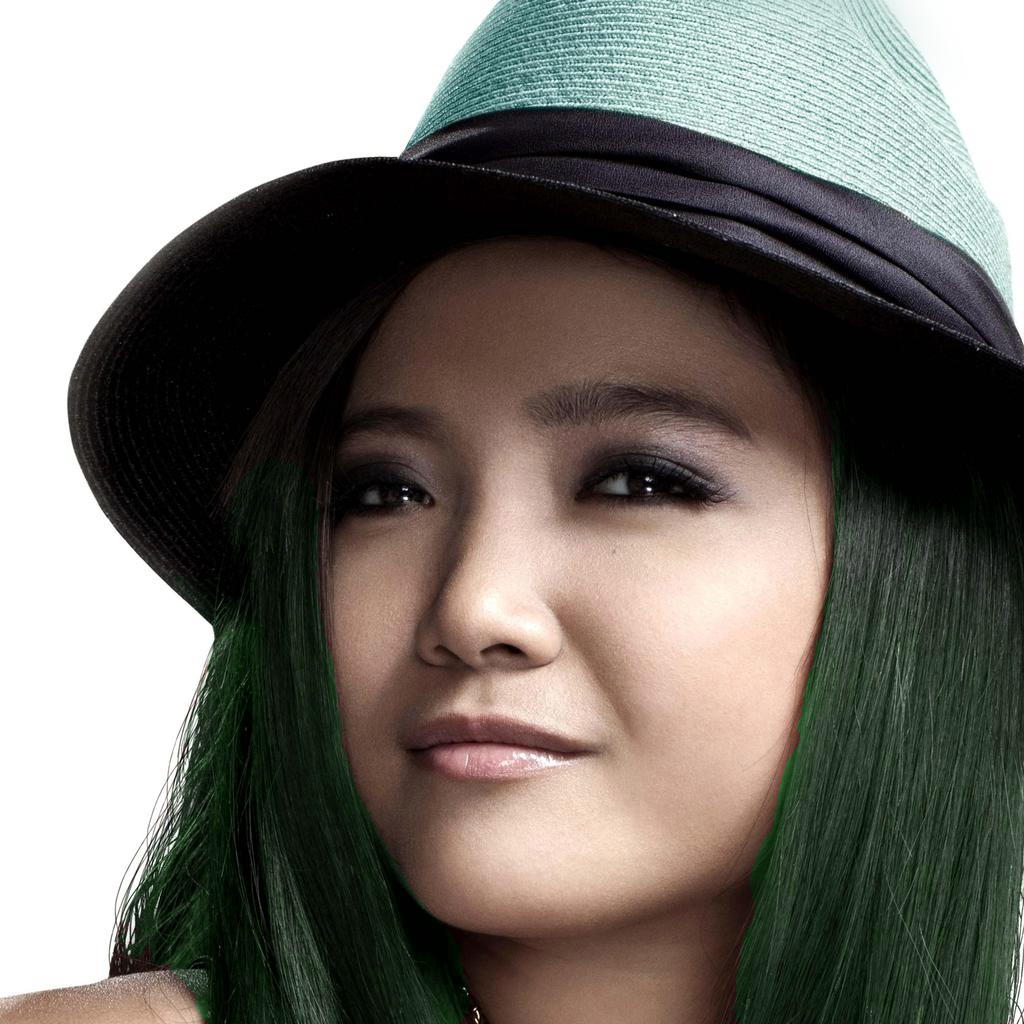

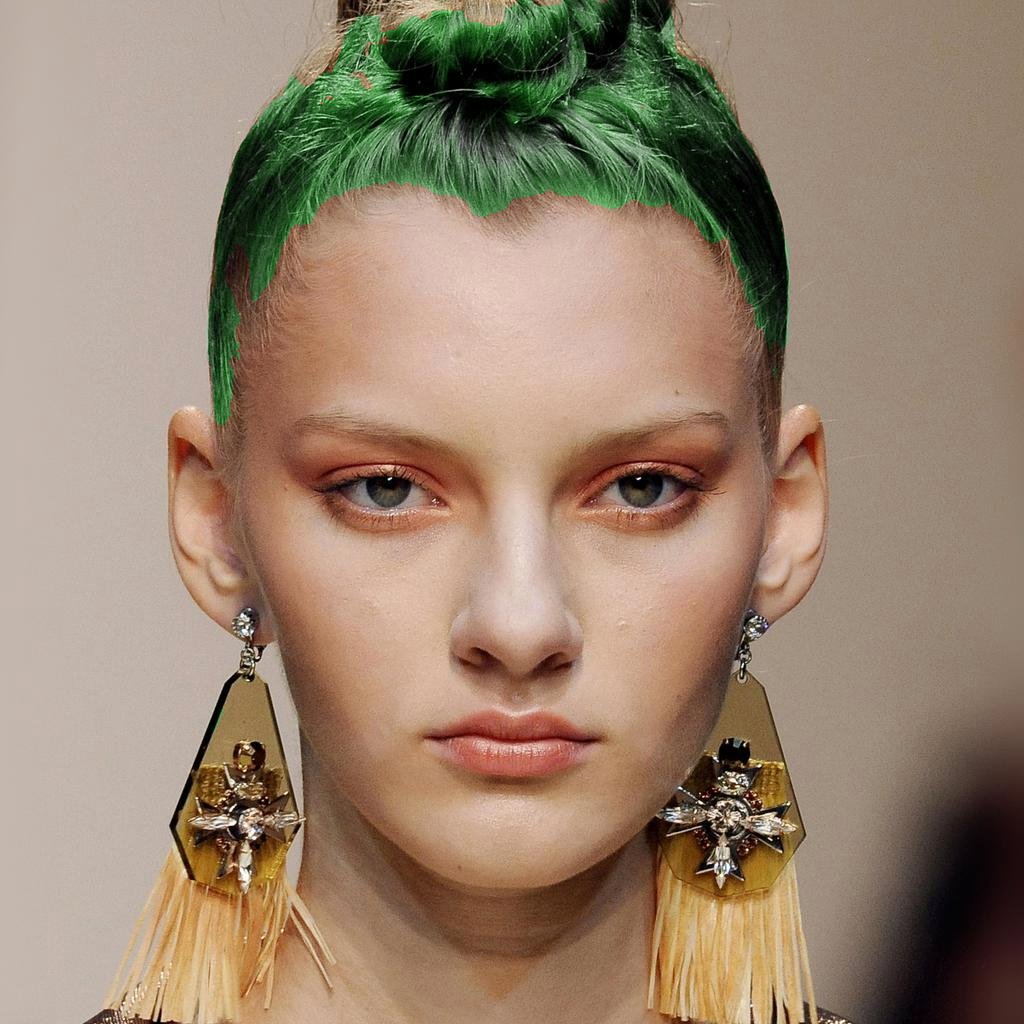

1.6336774826049805
Accuracy 0.8168387413024902


In [13]:
import matplotlib.pyplot as plt
import cv2
import glob
import time
from tensorflow import keras 
import tensorflow as tf
import numpy as np
import colorsys
import os
import torch
from google.colab.patches import cv2_imshow

# from tf_unet import unet, util, image_util
# from tensorflow.python.framework import ops
dim = (1024,1024)
sum_a = 0.0
image_path = sorted(os.listdir('/content/drive/MyDrive/Test_Images/'))
mask_path = sorted(os.listdir("/content/drive/MyDrive/Test_Masks"))
for i in range(len(image_path)):
  man = cv2.cvtColor(cv2.imread(os.path.join('/content/drive/MyDrive/Test_Images/',image_path[i])),cv2.COLOR_BGR2RGB)
  # print("Man Shape",man.shape)
  imDlib2 = cv2.cvtColor(man,cv2.COLOR_BGR2RGB)
  choice = imDlib2
  model = keras.models.load_model('/content/drive/MyDrive/hairnet_matting_30.hdf5')
  # model = tf.keras.models.load_model('/content/drive/MyDrive/model.h5')
  # model = tf.keras.models.load_model('/content/drive/MyDrive/model_new_5epochs/')
  # model = tf.keras.models.load_model('/content/drive/MyDrive')
  
  def predict(man, height=224, width=224):
    im = man.copy()
    im = im / 255
    im = cv2.resize(im, (height, width))
    im = im.reshape((1,) + im.shape)
    # print("img pred:",im.shape)
    # Convimg = tf.convert_to_tensor(im)
    # print(Convimg.shape)
    # # image = Convimg.transpose
    # image = tf.transpose(im,(0,3,1,2))
    # image = im.reshape(1,3,1024,1024)
    pred = model.predict(im)
   
    mask = pred.copy()
    # print("mask shape:", mask.shape)
    mask = mask.reshape((224, 224,1))
    row, col, _ = man.shape
    mask = cv2.resize(mask, (col, row))
    return mask
  color = (0, 12, 0)

  img = choice.copy()
  hairmask = predict(img)
  threshold = 0.7
  bit8_hairmask = hairmask.copy()
  a = np.where(bit8_hairmask>0.7 , 255,0)
  bit8_hairmask[bit8_hairmask > threshold] = 255
  bit8_hairmask[bit8_hairmask <= threshold] = 0
  # print("out shape:",bit8_hairmask.shape )
  # print("hairmask shape:", hairmask.shape)
  bin_hairmask = bit8_hairmask.astype(np.bool)
  # print(bin_hairmask.shape)
  # plt.imshow(bin_hairmask)
  rgb_mask = bit8_hairmask.copy()
  rgb_mask = rgb_mask.astype(np.uint8)
  rgb_mask = rgb_mask[:,:,np.newaxis]
  # print("mask",rgb_mask.shape)
  rgb_mask = rgb_mask.repeat(3, axis = 2)
  r, g, b = color
  rgb_mask[:,:,0][bin_hairmask] = r
  rgb_mask[:,:,1][bin_hairmask] = g
  rgb_mask[:,:,2][bin_hairmask] = b
  # plt.imshow(rgb_mask)
  hls_mask = cv2.cvtColor(rgb_mask, cv2.COLOR_RGB2HLS)
  hls_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
  channel = 0
  h_mask, h_img = hls_mask[:,:, channel], hls_img[:,:, channel]

  h_img[bin_hairmask] = h_mask[bin_hairmask]

  rgb_img = cv2.cvtColor(hls_img, cv2.COLOR_HLS2RGB)

  cv2_imshow(rgb_img)
  
  img1 = rgb_img.astype(np.uint8)
  # cv2_imshow(img1)
  # cv2_imshow(a)
  # print(i)
  metric = tf.keras.metrics.Accuracy()
  metric.update_state(resized_img,a)
  sum_a =  sum_a + metric.result().numpy()
print(sum_a)
print("Accuracy",sum_a/len(image_path))
  

In [36]:
np.min(bit8_hairmask)

0.0

In [23]:
s = '    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 224, 224, 1), found shape=(None, 3, 1024, 1024)'

s.split(' ')
s  = '00000'
str(int(s))

'0'

In [ ]:
!pip install tensorflow==1.15.5

  Using cached tensorflow-1.15.5-cp37-cp37m-manylinux2010_x86_64.whl (110.5 MB)
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Using cached gast-0.2.2-py3-none-any.whl
  Using cached tensorflow_estimator-1.15.1-py2.py3-none-any.whl (503 kB)
  Using cached tensorboard-1.15.0-py3-none-any.whl (3.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalli

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(1024, 1024)


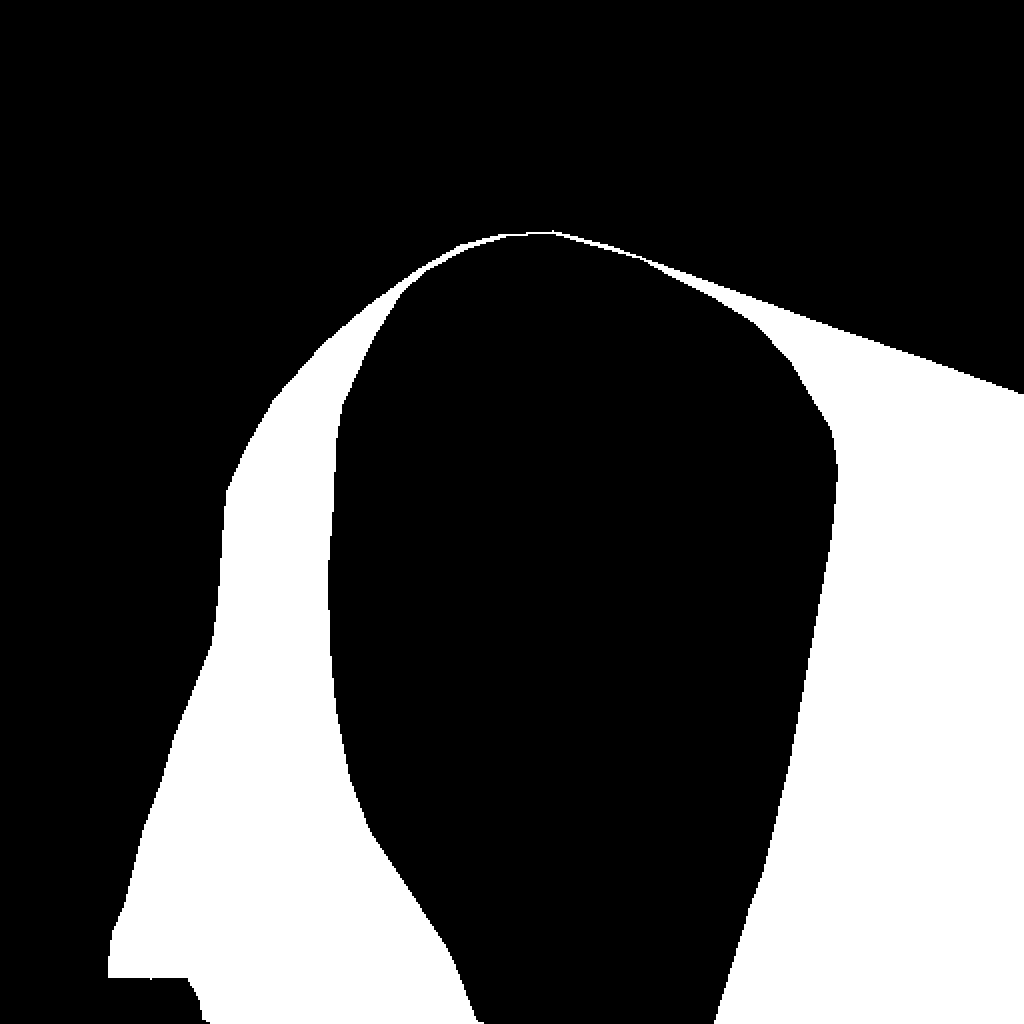

(1024, 1024)


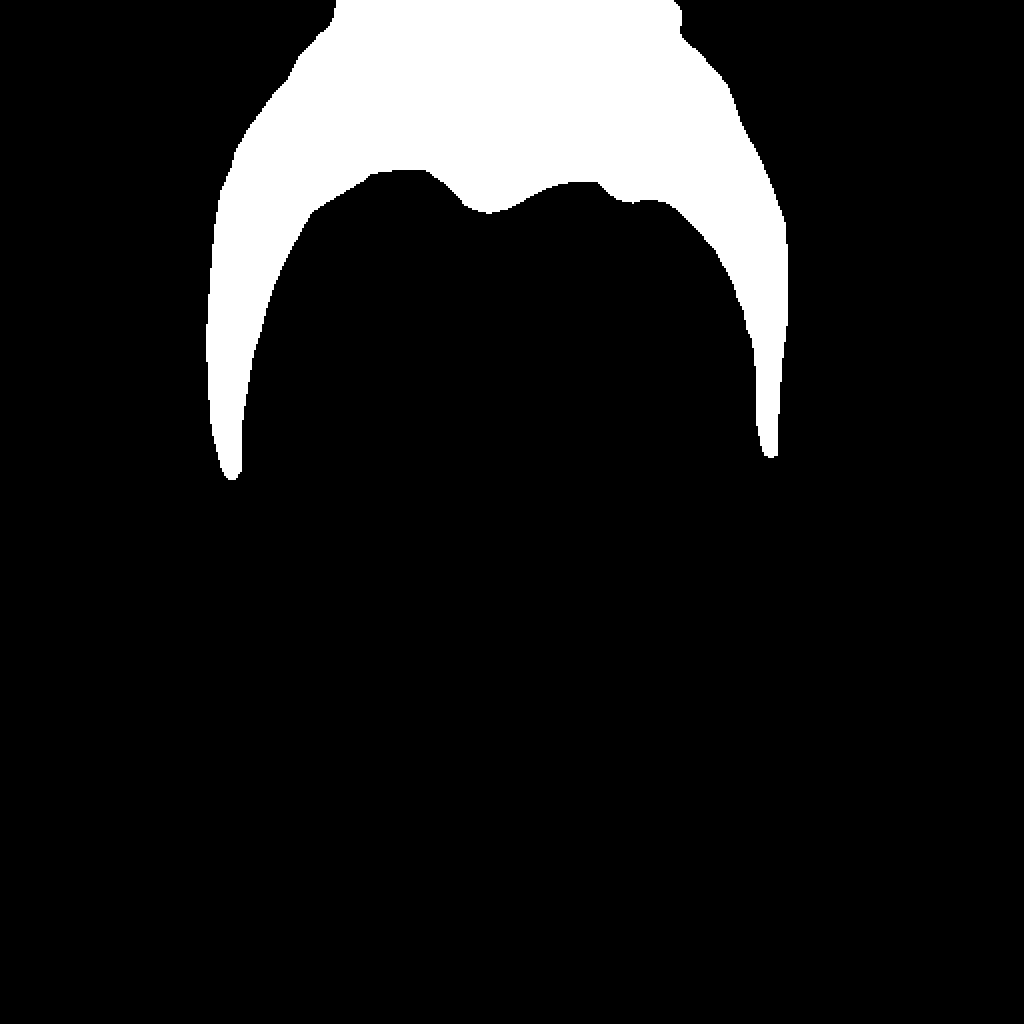

In [12]:
from sklearn.metrics import accuracy_score
for i in range(len(mask_path)):
  img_mask = cv2.cvtColor(cv2.imread(os.path.join('/content/drive/MyDrive/Test_Masks/',mask_path[i])), cv2.COLOR_BGR2GRAY)
  # cv2_imshow(img_mask)
  dim = (1024,1024)
  resized_img = cv2.resize(img_mask, dim, interpolation = cv2.INTER_AREA)
  print (resized_img.shape)
  resized_img = cv2.resize(img_mask, dim, interpolation = cv2.INTER_AREA)
  cv2_imshow(resized_img)
  

In [ ]:
len(mask_path)

2

In [ ]:
resized_img.shape, a.shape

((1024, 1024), (1024, 1024))

In [ ]:
import tensorflow as tf
# from tf.keras.metrics import Accuracy
b = 0
for i in range(len(mask_path)):
  print(i)
  metric = tf.keras.metrics.Accuracy()
  metric.update_state(resized_img,a)
  print(metric.result().numpy())
  # print(b/6)
# print("Acc",b/len(mask_path))

NameError: ignored

In [ ]:
!apt install tensorflow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package tensorflow
